# **Linear Regression, Logistic Regression & Random Forest** 

- The first purpose of building multiple regression models in this study is to predict the value of income based on the value of independent variables.
- The second one is to determine if gender is significantly impacting income.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, log_loss, roc_auc_score
import statsmodels.api as sm 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
plt.style.use('ggplot')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pay_gap=pd.read_csv("../input/glassdoor-analyze-gender-pay-gap/Glassdoor Gender Pay Gap.csv", encoding="UTF-8")


/kaggle/input/glassdoor-analyze-gender-pay-gap/Glassdoor Gender Pay Gap.csv


In [2]:
pay_gap
print(pay_gap.isnull().sum())

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64


In [3]:
pay_gap.info()    #Seniority (No of years worked)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
pay_gap.describe(include='all')

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
count,1000,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000
unique,10,2,NaN,NaN,4,5,NaN,NaN,NaN
top,Marketing Associate,Male,NaN,NaN,High School,Operations,NaN,NaN,NaN
freq,118,532,NaN,NaN,265,210,NaN,NaN,NaN
mean,NaN,NaN,41.393000,3.037000,NaN,NaN,2.971000,94472.653000,6467.161000
std,NaN,NaN,14.294856,1.423959,NaN,NaN,1.395029,25337.493272,2004.377365
min,NaN,NaN,18.000000,1.000000,NaN,NaN,1.000000,34208.000000,1703.000000
25%,NaN,NaN,29.000000,2.000000,NaN,NaN,2.000000,76850.250000,4849.500000
50%,NaN,NaN,41.000000,3.000000,NaN,NaN,3.000000,93327.500000,6507.000000
75%,NaN,NaN,54.250000,4.000000,NaN,NaN,4.000000,111558.000000,8026.000000


## **Logistic Regression**

In [5]:
pay_gap_logistic=pay_gap
bins = [17, 35, 50, 66]
labels = ['Young Adults','Middle-aged Adults','Old Adults']
pay_gap_logistic['Age'] = pd.cut(pay_gap_logistic['Age'], bins = bins, labels=labels)

In [6]:
bins = [34000, 100000, 180000]
labels = ['Low income','High income']
pay_gap_logistic['BasePay'] = pd.cut(pay_gap_logistic['BasePay'], bins = bins, labels=labels)
pay_gap_logistic["BasePay"]=pay_gap_logistic.BasePay.replace(to_replace=['Low income','High income'], value=[0, 1])

In [7]:
bins = [1700, 5000, 10000, 11500]
labels = ['Low','Middle','High']
pay_gap_logistic['Bonus'] = pd.cut(pay_gap_logistic['Bonus'], bins = bins, labels=labels)

In [8]:
pay_gap_logistic["Gender"]=pay_gap_logistic.Gender.replace(to_replace=['Male', 'Female'], value=[0, 1])
pay_gap_logistic

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,1,Young Adults,5,College,Operations,2,0,Middle
1,Software Engineer,0,Young Adults,5,College,Management,5,1,High
2,Warehouse Associate,1,Young Adults,4,PhD,Administration,5,0,Middle
3,Software Engineer,0,Young Adults,5,Masters,Sales,4,1,High
4,Graphic Designer,0,Young Adults,5,Masters,Engineering,5,0,Middle
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,1,Old Adults,1,High School,Administration,1,0,Low
996,Data Scientist,0,Old Adults,1,Masters,Sales,2,1,Low
997,Financial Analyst,0,Middle-aged Adults,1,High School,Operations,1,0,Low
998,Financial Analyst,0,Old Adults,2,High School,Administration,1,0,Low


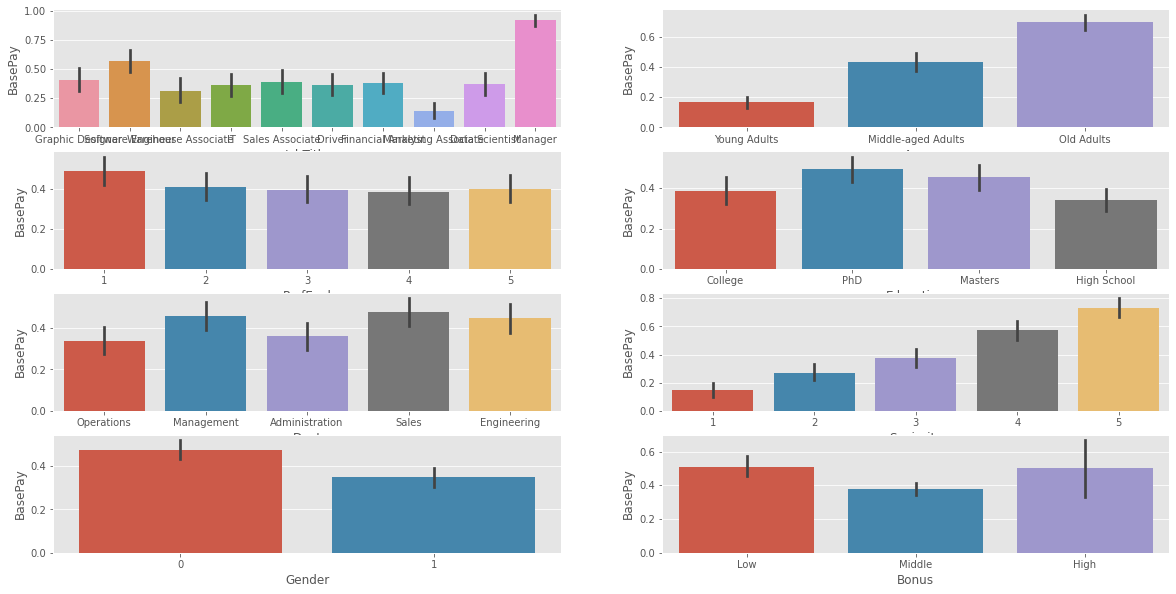

In [9]:
plt.figure(figsize=(20, 10))
plt.subplot(421)
sns.barplot(x = 'JobTitle', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(422)
sns.barplot(x = 'Age', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(423)
sns.barplot(x = 'PerfEval', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(424)
sns.barplot(x = 'Education', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(425)
sns.barplot(x = 'Dept', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(426)
sns.barplot(x = 'Seniority', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(427)
sns.barplot(x = 'Gender', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(428)
sns.barplot(x = 'Bonus', y = 'BasePay', data = pay_gap_logistic);

In [10]:
dummies = ['JobTitle', 'Age', 'Education', 'Dept','Bonus']
dummy_pay_gap_logistic = pd.get_dummies(pay_gap_logistic[dummies])
dummy_pay_gap_logistic

,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,...,Education_Masters,Education_PhD,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales,Bonus_Low,Bonus_Middle,Bonus_High
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
996,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
998,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [11]:
# We will concat the two data frames, and drop the old columns.
pay_gap_logistic1 = pd.concat([pay_gap_logistic, dummy_pay_gap_logistic], axis = 1)
pay_gap_logistic1.drop(dummies, axis=1, inplace=True)
pay_gap_logistic1

,Gender,PerfEval,Seniority,BasePay,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,...,Education_Masters,Education_PhD,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales,Bonus_Low,Bonus_Middle,Bonus_High
0,1,5,2,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,5,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,4,5,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,5,4,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,0,5,5,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
996,0,1,2,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
997,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
998,0,2,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Split Dataset into Training Set and Test Set

In [12]:
X = pay_gap_logistic1.drop('BasePay', axis = 1)
y = pay_gap_logistic1['BasePay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [14]:
m_names = ['accuracy_score', 'log_loss']
metrics = [accuracy_score, log_loss]
for n, m in zip(m_names, metrics):
    print('{:.5f} : {}'.format(m(y_test, y_pred), n))

0.84848 : accuracy_score
5.23320 : log_loss


### Plot Confusion Matrix For Binary Classes With Labels And Percentages

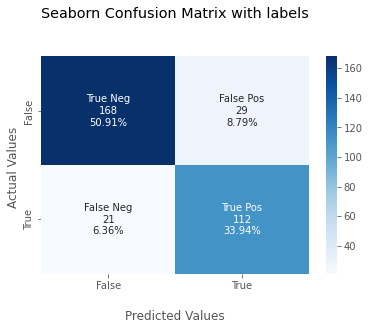

In [15]:
#Generate the confusion matrix
cf_matrix=confusion_matrix(y_pred, y_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Receiver Operating Characteristic

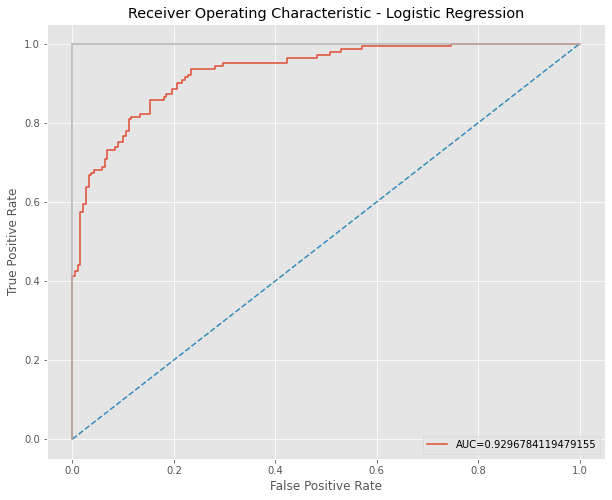

In [16]:
from sklearn import metrics

#define metrics
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC for this logistic regression model turns out to be 0.9296. Since this is close to 1, this confirms that the model does a great job of classifying data.

### Accuracy, Precision, Recall & F1-Score

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       189
           1       0.84      0.79      0.82       141

    accuracy                           0.85       330
   macro avg       0.85      0.84      0.84       330
weighted avg       0.85      0.85      0.85       330



- According to the recall score, 89% of all observations in the actual class are correctly predicted positive observations. 
- The precision score shows that 85% of the observations are correctly classified among the class. 
- The f1-score is the harmonic mean between precision & recall. In our case, the F1 score is 0.85.
- Our model is approx. 85% accurate.

Note: Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced. However, we have 189 of class 0 and 141 of class 1, which is a really well-balanced dataset.

## Logistic Regression Feature Importance

In [18]:
from matplotlib import pyplot
# get importance
importance = log_reg.coef_[0]
feature_imp = pd.Series(importance,index=X.columns.values).sort_values(ascending=False)
feature_imp

JobTitle_Manager                3.709892
Age_Old Adults                  2.095332
Seniority                       1.453540
JobTitle_Software Engineer      1.134140
Dept_Sales                      0.716028
Education_PhD                   0.520557
Bonus_Low                       0.475899
JobTitle_Financial Analyst      0.381266
Dept_Management                 0.243997
Education_Masters               0.182315
Dept_Engineering                0.166832
Age_Middle-aged Adults          0.146021
PerfEval                        0.023614
Gender                         -0.126626
JobTitle_Graphic Designer      -0.162293
Education_College              -0.226710
Bonus_Middle                   -0.227505
Bonus_High                     -0.248858
JobTitle_Sales Associate       -0.390681
Education_High School          -0.476625
JobTitle_Data Scientist        -0.486302
Dept_Administration            -0.541034
JobTitle_IT                    -0.543090
Dept_Operations                -0.586286
JobTitle_Warehou

The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

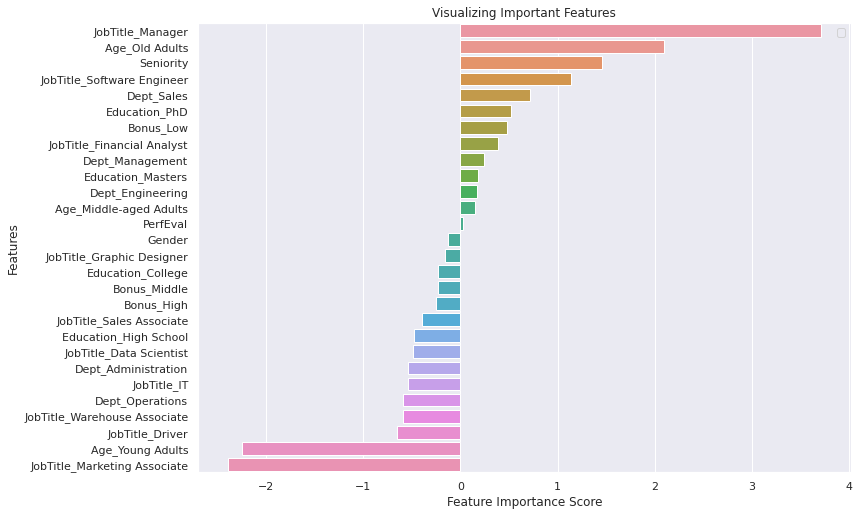

In [19]:
# Creating a bar plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## **Random Forest**

In [20]:
#Create a Gaussian Classifier
pay_gap_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
pay_gap_rf.fit(X_train,y_train)
y_pred=pay_gap_rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
m_names = ['accuracy_score', 'log_loss']
metrics = [accuracy_score, log_loss]
for n, m in zip(m_names, metrics):
    print('{:.5f} : {}'.format(m(y_test, y_pred), n))

0.84848 : accuracy_score
5.23320 : log_loss


### Plot Confusion Matrix For Binary Classes With Labels And Percentages

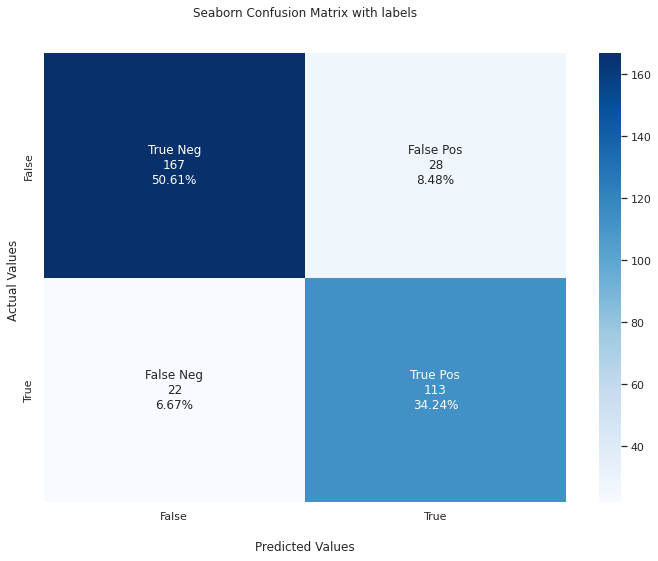

In [21]:
#Generate the confusion matrix
cf_matrix=confusion_matrix(y_pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Receiver Operating Characteristic

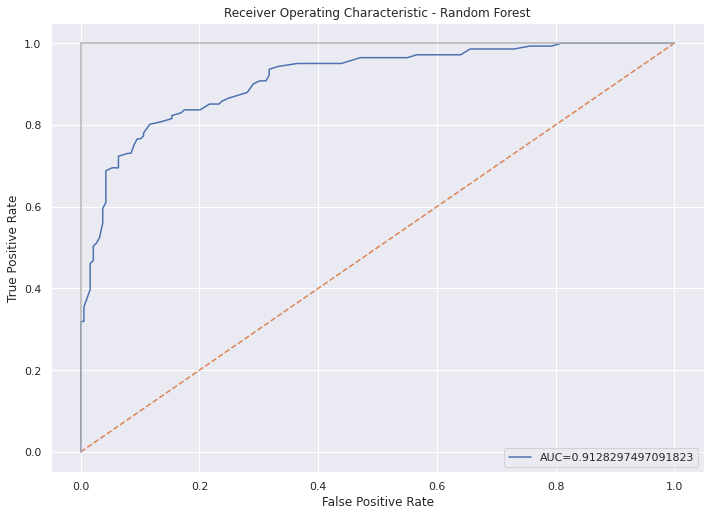

In [22]:
from sklearn import metrics
#define metrics
y_pred_proba = pay_gap_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC for this random forest model turns out to be 0.9082. Since this is close to 1, this confirms that the model does a great job of classifying data.

### Accuracy, Precision, Recall & F1-Score

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       189
           1       0.84      0.80      0.82       141

    accuracy                           0.85       330
   macro avg       0.85      0.84      0.84       330
weighted avg       0.85      0.85      0.85       330



- According to the recall score, 84% of all observations in the actual class are correctly predicted positive observations. 
- The precision score shows that 84% of the observations are correctly classified among the class. 
- The f1-score is the harmonic mean between precision & recall. In our case, the F1 score is 0.84.
- Our model is approx. 84% accurate.

In [24]:
feature_imp = pd.Series(pay_gap_rf.feature_importances_,index=X.columns.values).sort_values(ascending=False)
feature_imp 

Seniority                       0.214110
Age_Young Adults                0.103915
Age_Old Adults                  0.100788
JobTitle_Manager                0.080281
PerfEval                        0.059769
JobTitle_Marketing Associate    0.033871
Gender                          0.030057
Age_Middle-aged Adults          0.026911
Education_Masters               0.025292
Dept_Operations                 0.023687
Education_PhD                   0.021477
Dept_Sales                      0.020737
Education_College               0.019593
Dept_Administration             0.019206
JobTitle_Software Engineer      0.019155
Dept_Engineering                0.018860
Dept_Management                 0.018584
Education_High School           0.018219
JobTitle_Financial Analyst      0.017508
JobTitle_IT                     0.016747
Bonus_Low                       0.016743
JobTitle_Sales Associate        0.016613
Bonus_Middle                    0.016177
JobTitle_Warehouse Associate    0.015351
JobTitle_Data Sc

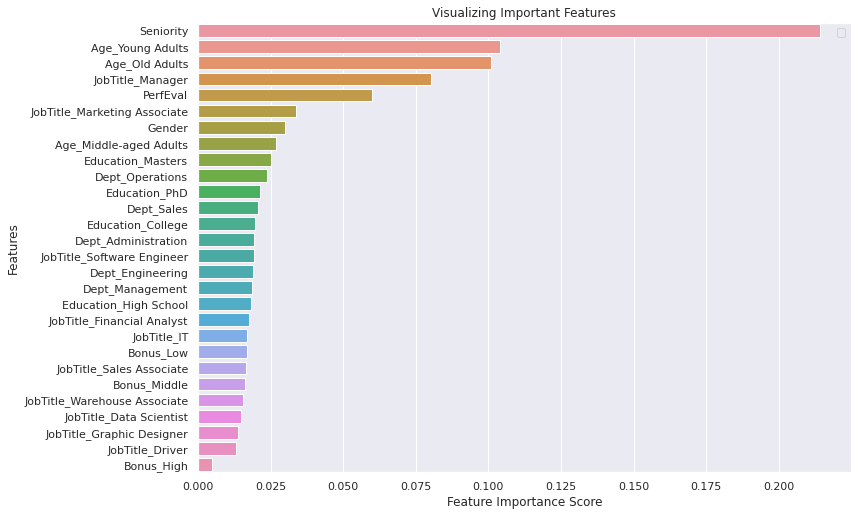

In [25]:
# Creating a bar plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## **Linear Regression**

<AxesSubplot:>

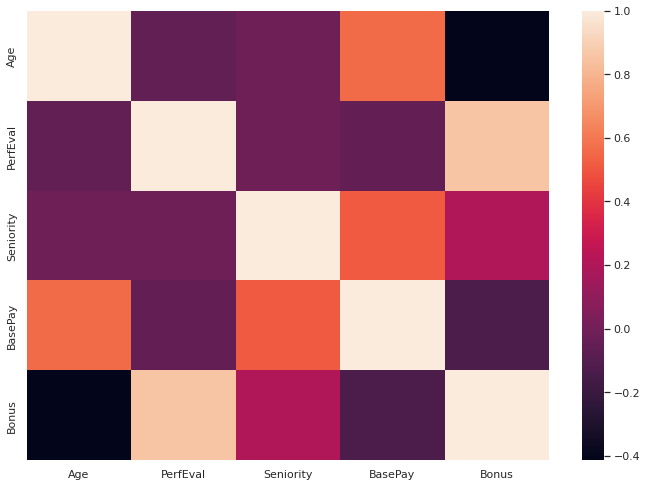

In [26]:
pay_gap=pd.read_csv("../input/glassdoor-analyze-gender-pay-gap/Glassdoor Gender Pay Gap.csv", encoding="UTF-8")
pay_gap_linear= pay_gap
sns.heatmap(pay_gap_linear.corr())           # drop Bonus

### Detect and Remove the Outliers

(array([353, 609, 927]),)


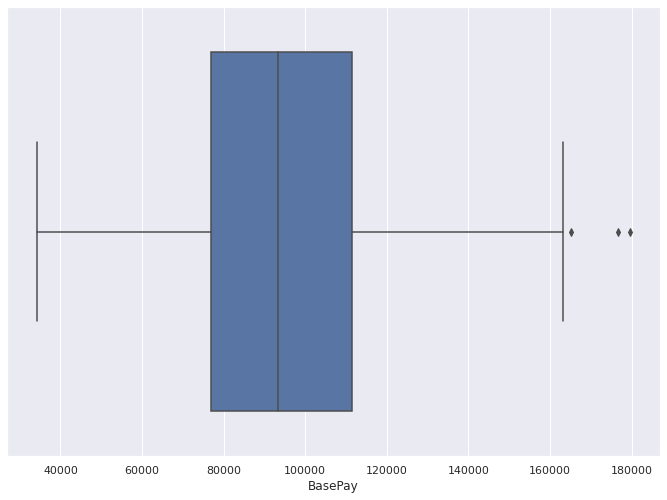

In [27]:
# Box Plot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(pay_gap_linear['BasePay'])
# Position of the Outlier
print(np.where(pay_gap_linear['BasePay']>165000))

In [28]:
# Removing the Outliers 
print("Old Shape: ", pay_gap_linear.shape)
pay_gap_linear = pay_gap_linear.drop(labels=[353, 609, 927], axis=0)
print("New Shape: ", pay_gap_linear.shape)

Old Shape:  (1000, 9)
New Shape:  (997, 9)


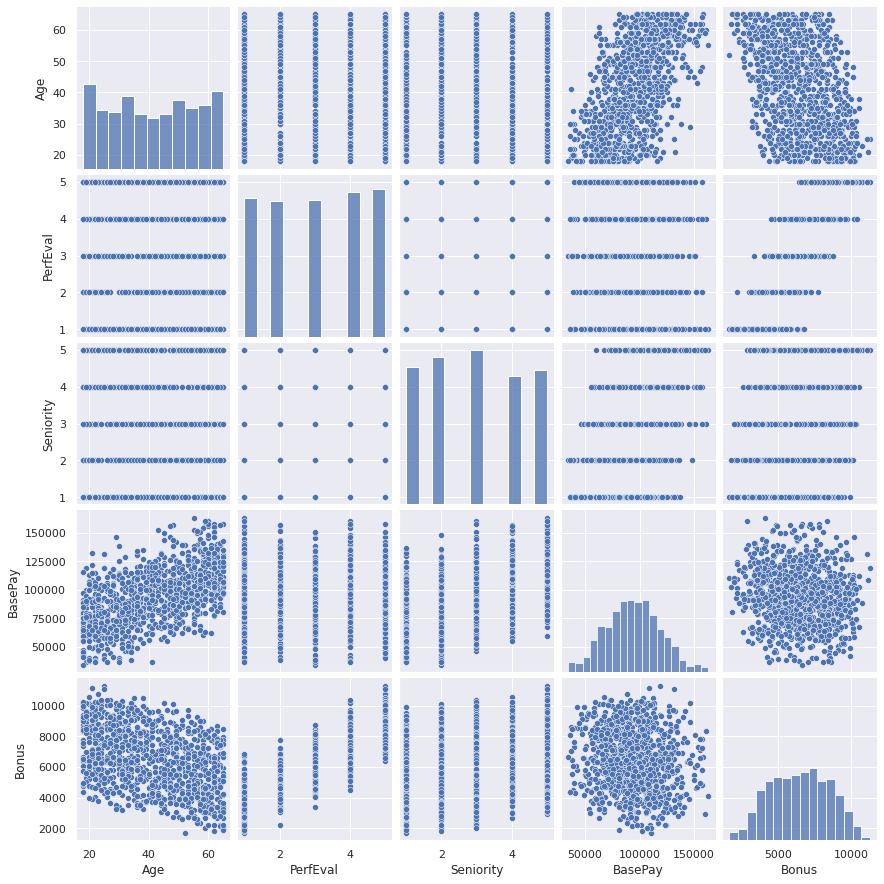

In [29]:
# Scatter plot
sns.pairplot(pay_gap_linear) # PerfEval has no effect on BasePay, so drop it. 

In [30]:
# LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = pay_gap_linear.drop(['Bonus','BasePay','JobTitle','Gender','Education','Dept','PerfEval'], axis = 1)
y = pay_gap_linear['BasePay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
# model 
reg = LinearRegression(fit_intercept=True)
# best fit
model = reg.fit(X_train, y_train)
# test
predict = model.predict(X_test)
mean_squared_error(y_test, predict)

276359272.8224846

In [31]:
r2_score(y_test, predict)

0.5318198105519882

- 53% variability in expenditure is associated or related with the regression equation and 47% variations are due to other factors.

## **Two Sample t-test**

**The two hypotheses for this particular two sample t-test are as follows:**

- H0: µ1 = µ2 (The average earnings of female workers are equal to the average earnings of male workers.)  

- HA: µ1 ≠µ2 (the two population means are not equal)

**Two-sample t-test assumptions**

- Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
- Data in each group must be obtained via a random sample from the population.
- Data in each group are normally distributed.
- Data values are continuous.
- The variances for the two independent groups are equal.

**Assumptions Check**

- **Checking Normality Assumption**

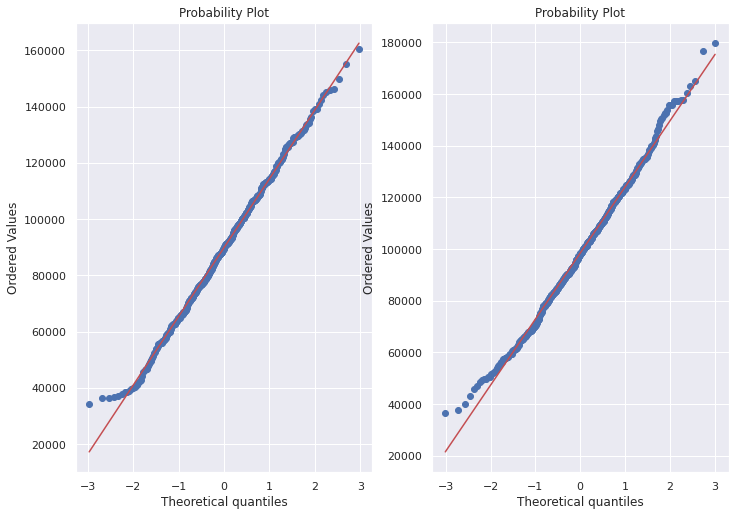

In [32]:
import scipy.stats as stats
import pylab 

pay_gaps = [rows for _, rows in pay_gap.groupby('Gender')]
pay_gaps[0].BasePay   #Female
pay_gaps[1].BasePay   #Male
  
# Quantile-Quantile Plot
plt.subplot(121)
stats.probplot(pay_gaps[0].BasePay, dist="norm", plot=pylab)
plt.subplot(122)
stats.probplot(pay_gaps[1].BasePay, dist="norm", plot=pylab)
pylab.show()

- **Checking Variance Assumption**

In [33]:
#find variance for each group
print(np.var(pay_gaps[0].BasePay), np.var(pay_gaps[1].BasePay))
print(np.var(pay_gaps[1].BasePay) / np.var(pay_gaps[1].BasePay))  #ratio_of_variances


593030541.6657311 649919889.0675142
1.0


The ratio of the larger sample variance to the smaller sample variance is 1, which is less than 4. This means we can assume that the population variances are equal.

- **Performing two sample t-test with equal variances**

In [34]:
stats.ttest_ind(a=pay_gaps[0].BasePay , b=pay_gaps[1].BasePay , equal_var=True)

Ttest_indResult(statistic=-5.376104124176958, pvalue=9.478621943012633e-08)

Because the p-value of our test (0.000) is less than alpha = 0.05, we may reject the null hypothesis of the test. We have sufficient evidence to say that __there is a significant difference in earnings between women and men.__